In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [111]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head(30)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,44.0,0,0,never,19.31,6.5,200,1
1,Male,67.0,0,1,not current,27.32,6.5,200,1
2,Male,50.0,1,0,current,27.32,5.7,260,1
3,Male,73.0,0,0,former,25.91,9.0,160,1
4,Female,53.0,0,0,former,27.32,7.0,159,1
5,Male,50.0,0,0,former,37.16,9.0,159,1
6,Female,67.0,0,0,never,63.48,8.8,155,1
7,Male,57.0,0,0,No Info,27.32,8.2,126,1
8,Female,36.0,0,0,current,32.27,6.2,220,1
9,Female,60.0,0,0,never,27.32,7.5,300,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44850 entries, 0 to 44849
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               44850 non-null  object 
 1   age                  44850 non-null  float64
 2   hypertension         44850 non-null  int64  
 3   heart_disease        44850 non-null  int64  
 4   smoking_history      44850 non-null  object 
 5   bmi                  44850 non-null  float64
 6   HbA1c_level          44850 non-null  float64
 7   blood_glucose_level  44850 non-null  int64  
 8   diabetes             44850 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.1+ MB


In [5]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

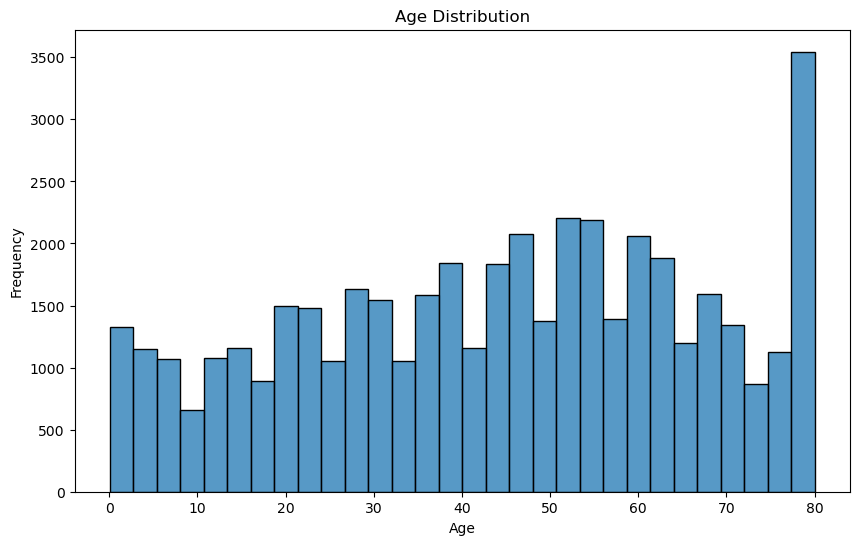

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

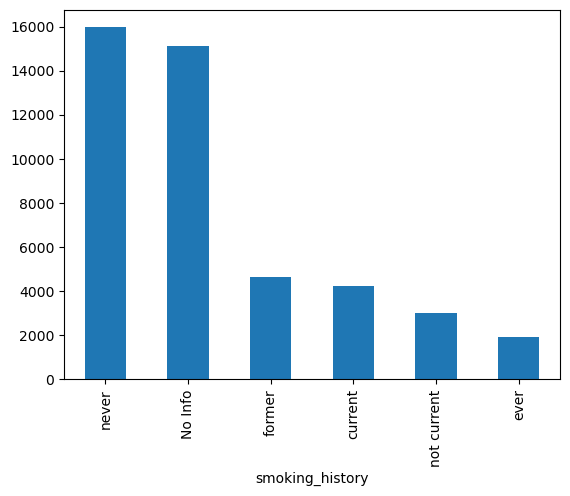

In [7]:
df.smoking_history.value_counts().plot(kind='bar')
plt.show()

In [8]:
from scipy.stats import chi2_contingency
ops = pd.crosstab(df.diabetes, df.smoking_history)
chi, p, dof, ex = chi2_contingency(ops)
p

0.0

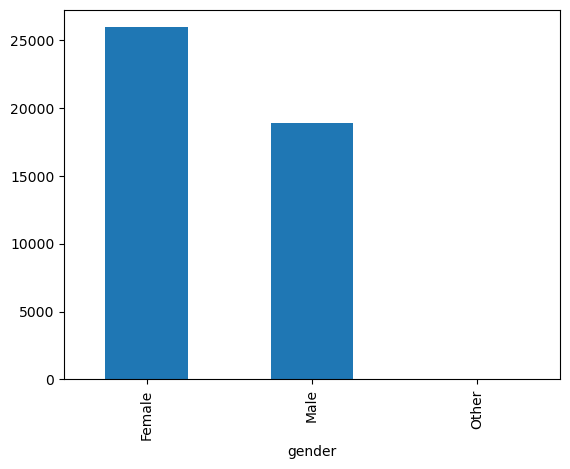

In [9]:
df.gender.value_counts().plot(kind='bar')
plt.show()

In [10]:
df.gender.value_counts()

gender
Female    25934
Male      18909
Other         7
Name: count, dtype: int64

In [11]:
df.groupby('gender').mean(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,
Female,44.395083,0.090962,0.036053,28.011502,5.663438,143.560076,0.172014
Male,43.794714,0.100270,0.075467,27.647657,5.727860,146.160876,0.213602
Other,30.142857,0.000000,0.000000,28.751429,5.042857,143.142857,0.000000


In [12]:
pd.crosstab(df.gender, df.smoking_history)

smoking_history,No Info,current,ever,former,never,not current
gender,,,,,,
Female,8272,2294,1045,2271,10237,1815
Male,6823,1931,875,2354,5726,1200
Other,3,0,1,0,0,3


In [13]:
df.loc[df.gender=='Other', 'gender']='Female'

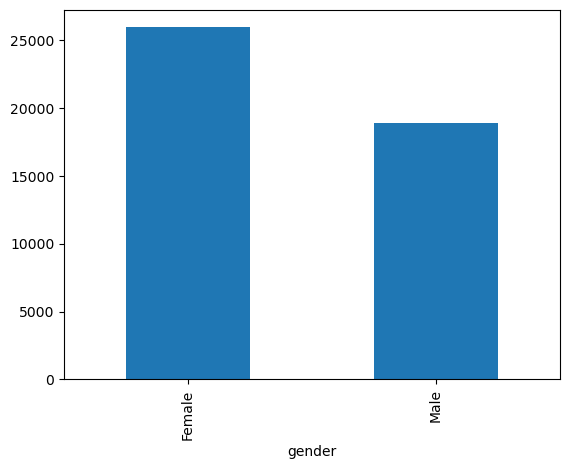

In [14]:
df.gender.value_counts().plot(kind='bar')
plt.show()

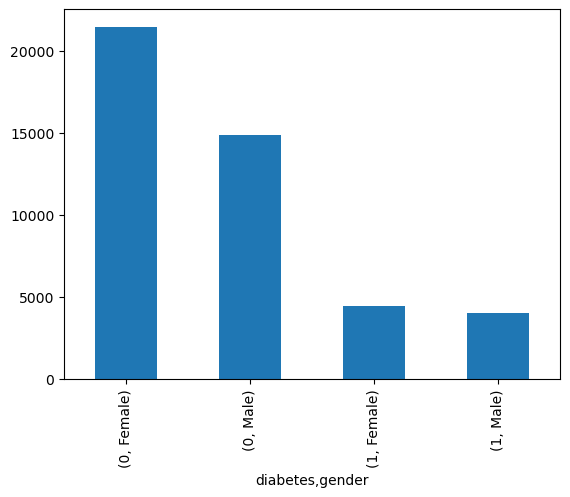

In [15]:
df.groupby('diabetes')['gender'].value_counts().plot(kind='bar')
plt.show()

In [16]:
from scipy.stats import chi2_contingency
ops = pd.crosstab(df.diabetes, df.gender)
chi, p, dof, ex = chi2_contingency(ops)
p

1.2893852567085854e-28

In [17]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,44850.000000,44850.000000,44850.000000,44850.000000,44850.000000,44850.000000,44850.000000
mean,44.139740,0.094872,0.052664,27.858218,5.690502,144.656522,0.189521
std,22.560837,0.293041,0.223365,6.902569,1.161594,46.500819,0.391926
min,0.080000,0.000000,0.000000,10.080000,3.500000,80.000000,0.000000
25%,26.000000,0.000000,0.000000,24.140000,4.800000,126.000000,0.000000
50%,46.000000,0.000000,0.000000,27.320000,5.800000,145.000000,0.000000
75%,62.000000,0.000000,0.000000,30.410000,6.500000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


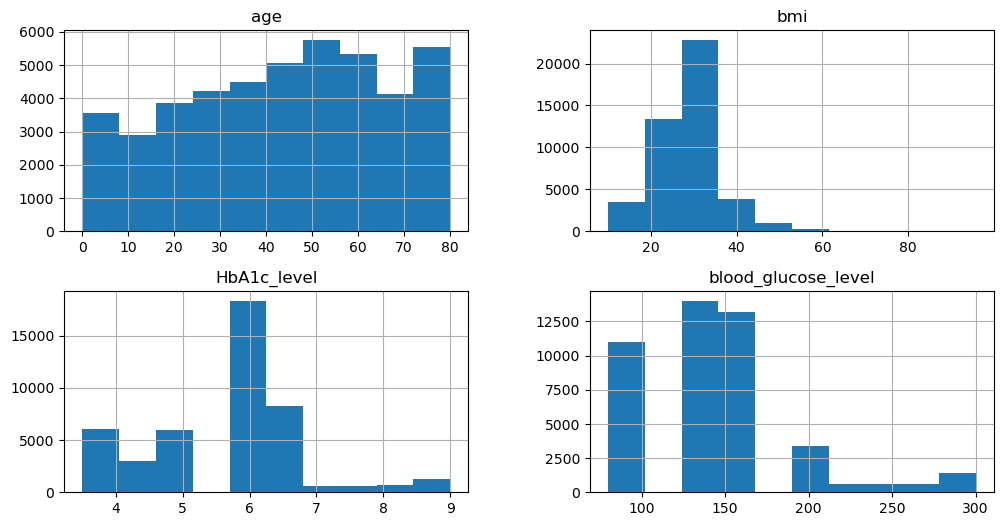

In [18]:
df[['age','bmi','HbA1c_level','blood_glucose_level']].hist(figsize=(12,6))
plt.show()

In [19]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()

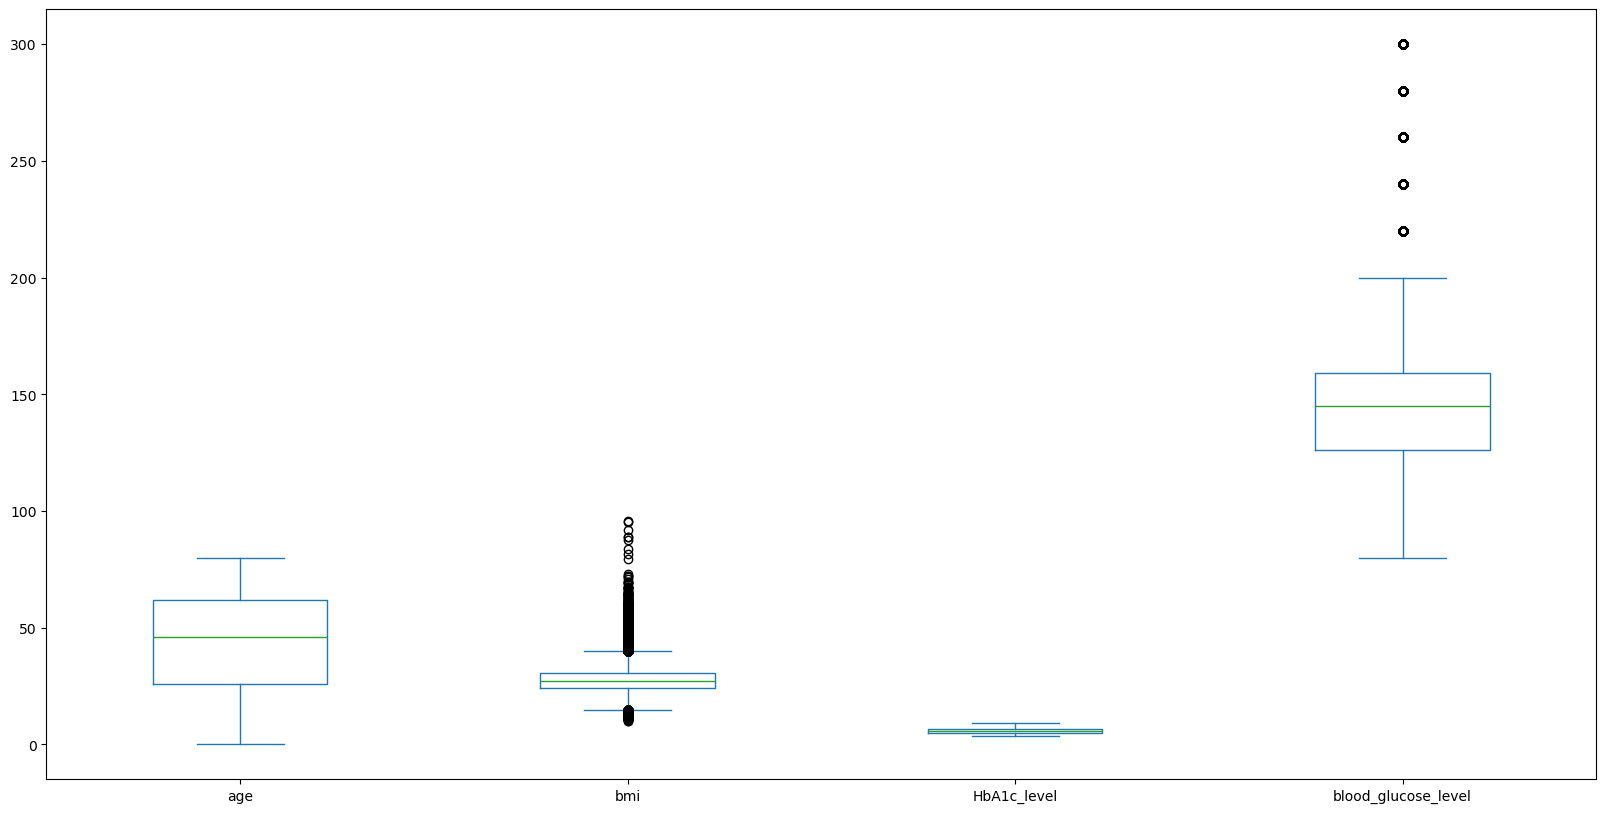

In [20]:
df[['age','bmi','HbA1c_level','blood_glucose_level']].plot(kind='box', figsize=(20,10))
plt.show()

In [21]:
df.diabetes.value_counts(normalize=True)

diabetes
0    0.810479
1    0.189521
Name: proportion, dtype: float64

In [22]:
df.hypertension.value_counts(normalize=True)

hypertension
0    0.905128
1    0.094872
Name: proportion, dtype: float64

In [23]:
df.heart_disease.value_counts(normalize=True)

heart_disease
0    0.947336
1    0.052664
Name: proportion, dtype: float64

In [24]:
pd.crosstab(index=df.diabetes, columns=df.hypertension, normalize='columns')

hypertension,0,1
diabetes,,
0,0.84205,0.509283
1,0.15795,0.490717


In [25]:
from scipy.stats import pearsonr
r, p = pearsonr(df.diabetes, df.heart_disease)
print(f'Coef. correlation: {r}, p-value: {p}')

Coef. correlation: 0.20868842216763336, p-value: 0.0


In [26]:
r, p = pearsonr(df.diabetes, df.hypertension)
print(f'Coef. correlation: {r}, p-value: {p}')

Coef. correlation: 0.24880765897731916, p-value: 0.0


In [27]:
df.gender=df.gender.apply(lambda x: 1 if x == 'Female' else 0)

In [28]:
# prompt: write a code to label encode smoking_history without changing the structure of df

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['smoking_history'] = le.fit_transform(df['smoking_history'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,44.0,0,0,never,19.31,6.5,200,1
1,0,67.0,0,1,not current,27.32,6.5,200,1
2,0,50.0,1,0,current,27.32,5.7,260,1
3,0,73.0,0,0,former,25.91,9.0,160,1
4,1,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
44845,1,80.0,0,0,No Info,27.32,6.2,90,0
44846,1,2.0,0,0,No Info,17.37,6.5,100,0
44847,0,66.0,0,0,former,27.83,5.7,155,0
44848,1,24.0,0,0,never,35.42,4.0,100,0


In [29]:
X=df.iloc[:,:-1]
Y= df.iloc[:,-1]


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=13)
print (X.shape, Y.shape)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(44850, 8) (44850,)
(35880, 8) (35880,)
(8970, 8) (8970,)


In [31]:
X_train=X_train.reset_index()
y_train=y_train.reset_index()
X_train=X_train.drop('index', axis=1)
y_train=y_train.drop('index', axis=1)

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
ohe = OneHotEncoder()
scale = MinMaxScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [1,2,3,5,6,7]),
            ('OHE', ohe, [0,4]),
        ],
        remainder='passthrough'
)

In [33]:
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScale', MinMaxScaler(),
                                 [1, 2, 3, 5, 6, 7]),
                                ('OHE', OneHotEncoder(), [0, 4])])

In [34]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)
X_train_dummy[0]

array([0.63713714, 0.        , 0.        , 0.20249002, 0.18181818,
       0.09090909, 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        ])

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, roc_auc_score

In [36]:
gridTree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid={'min_samples_leaf' : [2,6], 'max_depth' : [2,6], 'min_samples_split' : [2,3]}, cv=3, scoring='roc_auc')
gridKNN = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors' : [15,29]}, cv=5, scoring='roc_auc')
gridLogistic = GridSearchCV(estimator=LogisticRegression(), param_grid={'C' : [ 0.1, 0.5]}, cv=5, scoring='roc_auc')
gridBoost = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid={'learning_rate' : [0.05, 0.1], 'n_estimators': [70,100]} ,cv=3, scoring='roc_auc')

In [37]:
def evaulation(y, y_hat,):
    ConfusionMatrixDisplay(confusion_matrix(y, y_hat), display_labels=[False, True]).plot()
    plt.show()
    print(f'Recall: {recall_score(y, y_hat)}')
    print(f'Precision: {precision_score(y, y_hat)}')
def auc_print(y, y_hat_probs):
    print(f'AUC score: {roc_auc_score(y, y_hat_probs)}')

In [38]:
def resultsDataFrame(y, y_hat, y_hat_prob, column_name):
    return pd.DataFrame({f'{column_name}' : [round(roc_auc_score(y, y_hat_prob), 4), round(precision_score(y, y_hat), 4), round(recall_score(y, y_hat), 4)]}, index=['AUC', 'Precision', 'Recall'])

In [39]:
gridTree.fit(X_train_dummy, y_train)
print(gridTree.best_params_)

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}


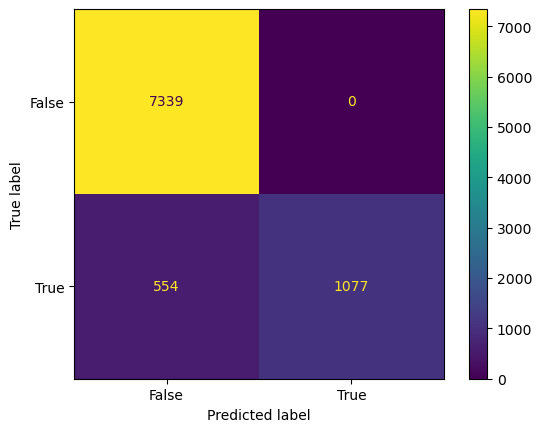

Recall: 0.6603310852237891
Precision: 1.0
AUC score: 0.9617465763524184


In [40]:
model_tree1 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=2,min_samples_split=2).fit(X_train_dummy, y_train)
evaulation(y_test, model_tree1.predict(X_test_dummy))
auc_print(y_test, model_tree1.predict_proba(X_test_dummy)[:,1])


In [41]:
gridKNN.fit(X_train_dummy, y_train)
print(gridKNN.best_params_)

{'n_neighbors': 29}


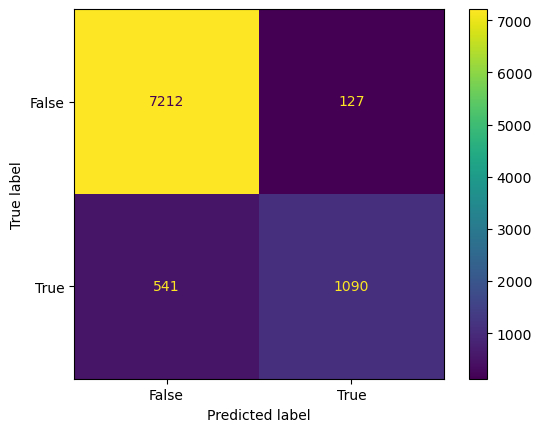

Recall: 0.668301655426119
Precision: 0.895645028759244
AUC score: 0.9620960777563137


In [42]:
model_knn1 = KNeighborsClassifier(n_neighbors=29).fit(X_train_dummy, y_train)
evaulation(y_test, model_knn1.predict(X_test_dummy))
auc_print(y_test, model_knn1.predict_proba(X_test_dummy)[:,1])


In [43]:
gridLogistic.fit(X_train_dummy, y_train)
print(gridLogistic.best_params_)

{'C': 0.5}


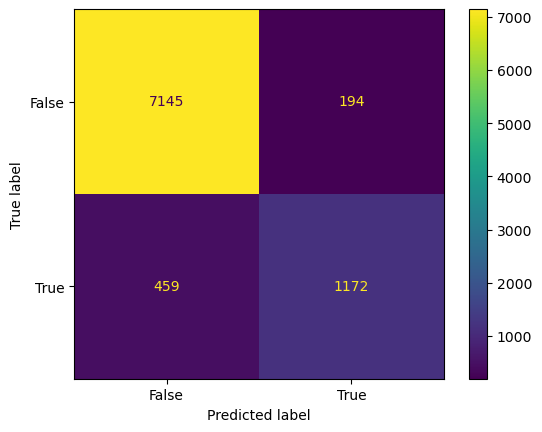

Recall: 0.7185775597792765
Precision: 0.8579795021961932
AUC score: 0.9591323125347069


In [44]:
model_log1 = LogisticRegression(C=0.8).fit(X_train_dummy, y_train)
evaulation(y_test, model_log1.predict(X_test_dummy))
auc_print(y_test, model_log1.predict_proba(X_test_dummy)[:,1])


In [45]:
gridBoost.fit(X_train_dummy, y_train)
print(gridBoost.best_params_)

{'learning_rate': 0.1, 'n_estimators': 100}


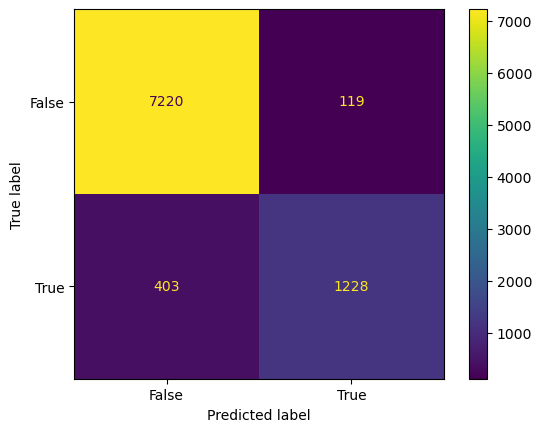

Recall: 0.7529123237277744
Precision: 0.9116555308092057
AUC score: 0.9771690829061441


In [46]:
model_boost1 = GradientBoostingClassifier(learning_rate=0.2, n_estimators=100).fit(X_train_dummy, y_train)
evaulation(y_test, model_boost1.predict(X_test_dummy))
auc_print(y_test, model_boost1.predict_proba(X_test_dummy)[:,1])


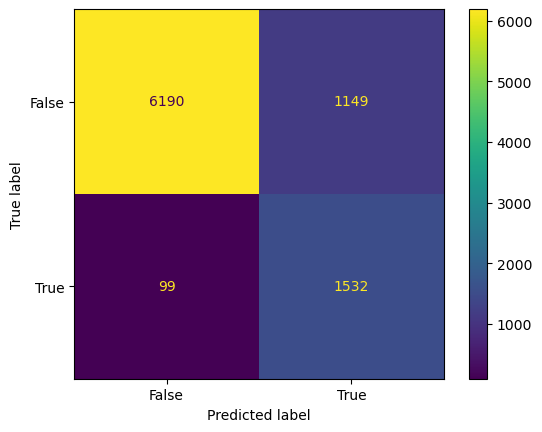

Recall: 0.9393010423053342
Precision: 0.5714285714285714
---------------------------------------------


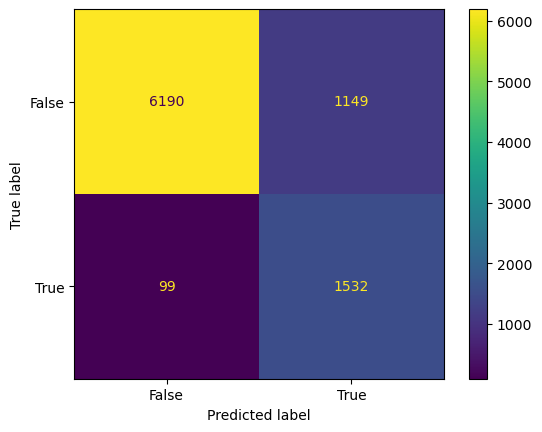

Recall: 0.9393010423053342
Precision: 0.5714285714285714
---------------------------------------------


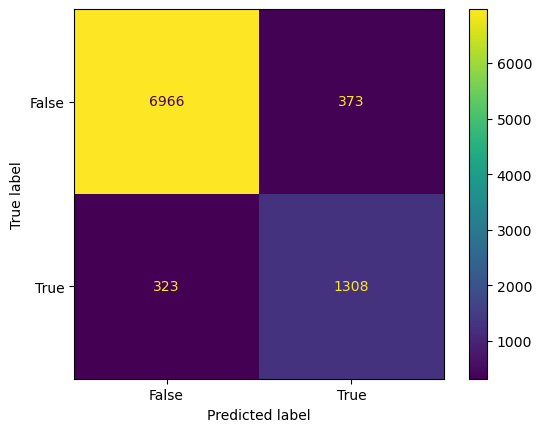

Recall: 0.8019619865113428
Precision: 0.7781082688875669
---------------------------------------------


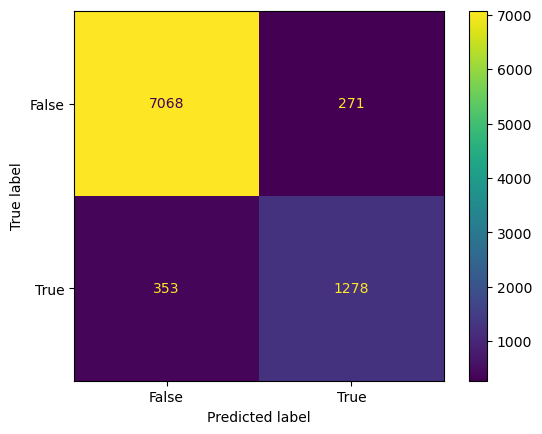

Recall: 0.7835683629675047
Precision: 0.8250484183344093
---------------------------------------------


In [47]:
for th in [0.1,0.2,0.3,0.4]:
    evaulation(y_test, model_tree1.predict_proba(X_test_dummy)[:,1]>=th)
    print('---------------------------------------------')

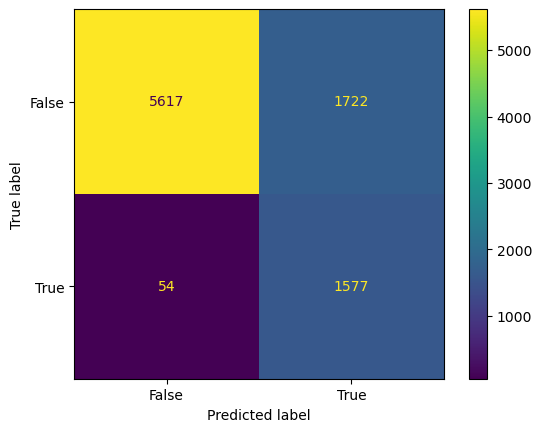

Recall: 0.9668914776210914
Precision: 0.4780236435283419
---------------------------------------------


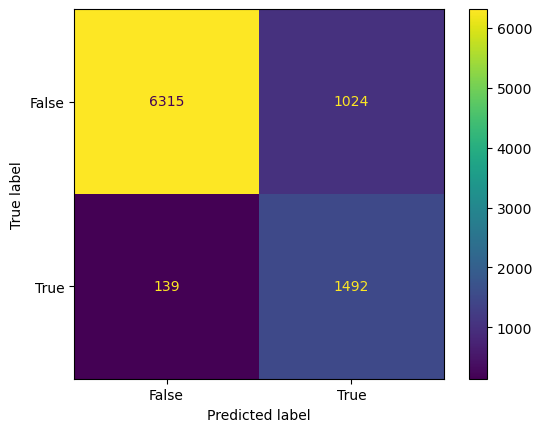

Recall: 0.91477621091355
Precision: 0.5930047694753577
---------------------------------------------


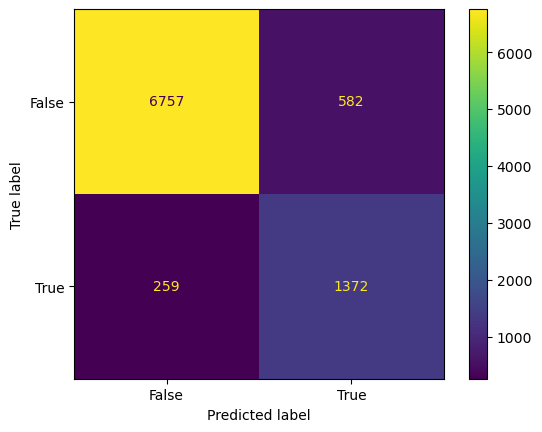

Recall: 0.8412017167381974
Precision: 0.7021494370522006
---------------------------------------------


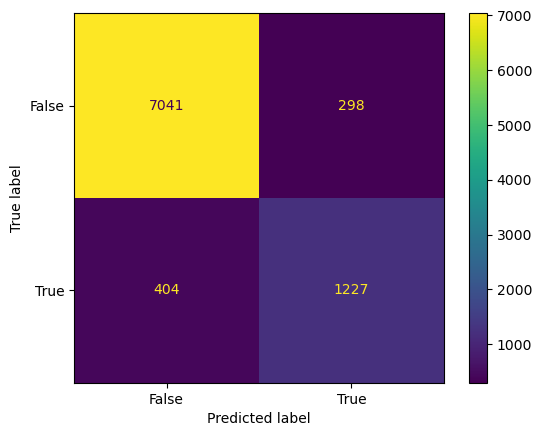

Recall: 0.7522992029429798
Precision: 0.8045901639344263
---------------------------------------------


In [48]:
for th in [0.1,0.2,0.3,0.4]:
    evaulation(y_test, model_knn1.predict_proba(X_test_dummy)[:,1]>=th)
    print('---------------------------------------------')

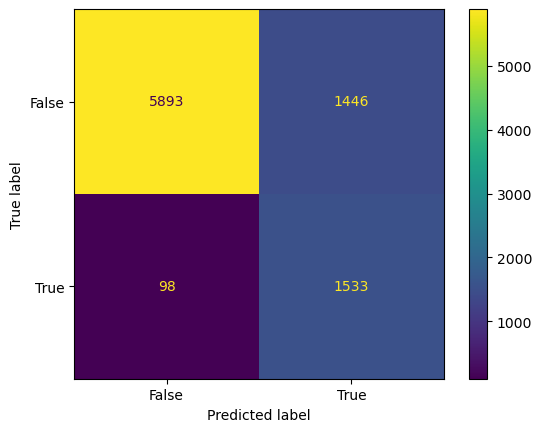

Recall: 0.9399141630901288
Precision: 0.5146022155085599
---------------------------------------------


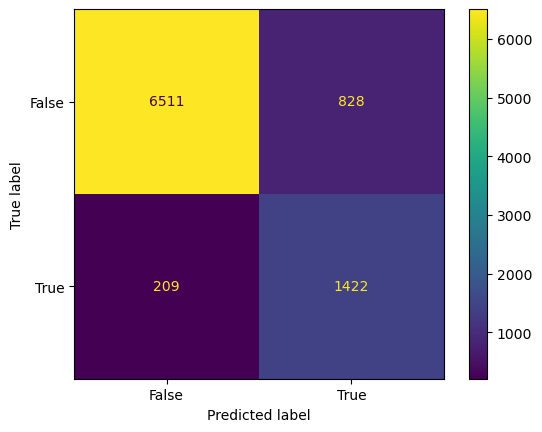

Recall: 0.8718577559779277
Precision: 0.632
---------------------------------------------


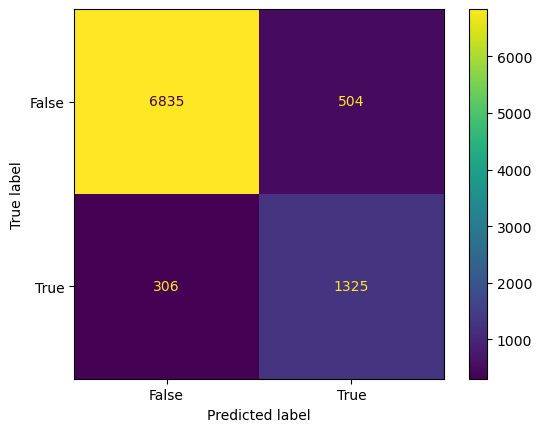

Recall: 0.812385039852851
Precision: 0.7244395844723893
---------------------------------------------


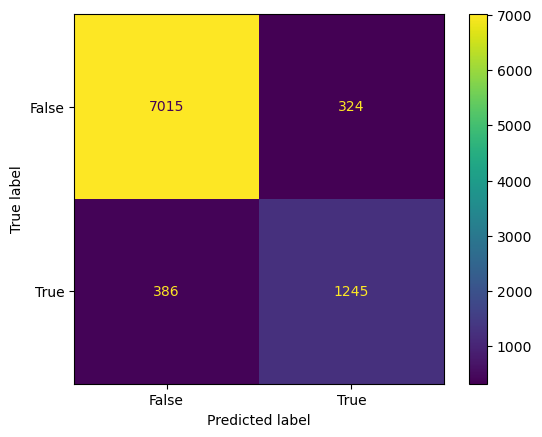

Recall: 0.7633353770692827
Precision: 0.7934990439770554
---------------------------------------------


In [49]:
for th in [0.1,0.2,0.3,0.4]:
    evaulation(y_test, model_log1.predict_proba(X_test_dummy)[:,1]>=th)
    print('---------------------------------------------')

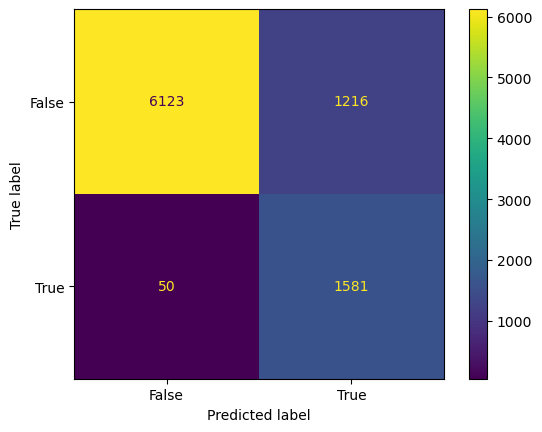

Recall: 0.9693439607602697
Precision: 0.5652484805148373
---------------------------------------------


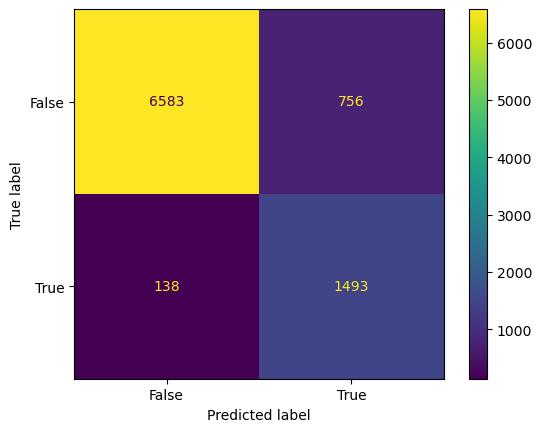

Recall: 0.9153893316983446
Precision: 0.6638506002667852
---------------------------------------------


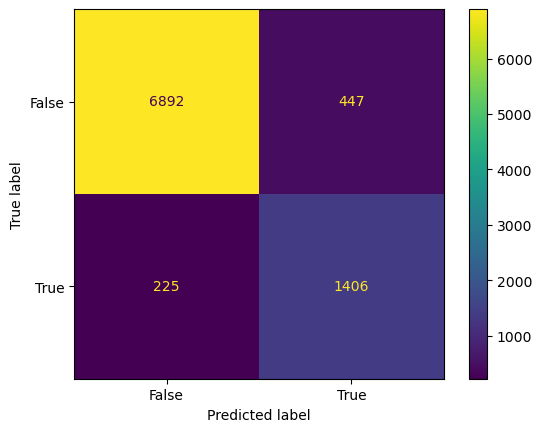

Recall: 0.862047823421214
Precision: 0.7587695628710199
---------------------------------------------


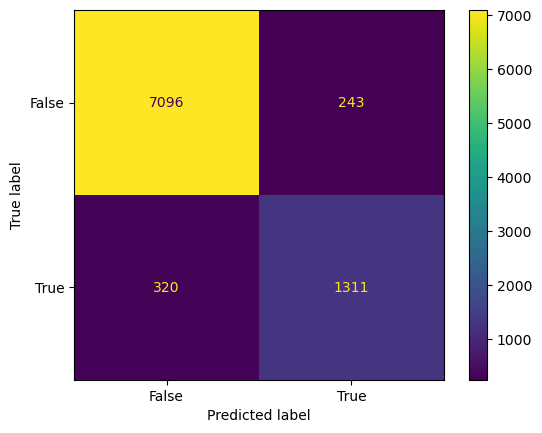

Recall: 0.8038013488657265
Precision: 0.8436293436293436
---------------------------------------------


In [50]:
for th in [0.1,0.2,0.3,0.4]:
    evaulation(y_test, model_boost1.predict_proba(X_test_dummy)[:,1]>=th)
    print('---------------------------------------------')

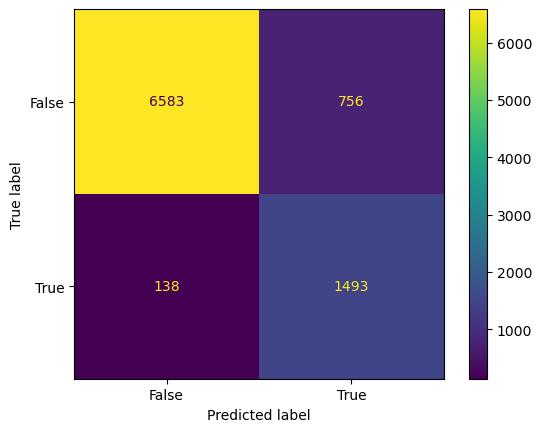

Recall: 0.9153893316983446
Precision: 0.6638506002667852
Accuracy: 0.9003344481605351
F1: 0.7695876288659794
FPR: 0.8969886905572967
AUC score: 0.9061890111278205


In [51]:
from sklearn.metrics import accuracy_score, f1_score
evaulation(y_test, model_boost1.predict_proba(X_test_dummy)[:,1]>=0.2)
print(f'Accuracy: {accuracy_score(y_test, model_boost1.predict_proba(X_test_dummy)[:,1]>=0.2)}')
print(f'F1: {f1_score(y_test, model_boost1.predict_proba(X_test_dummy)[:,1]>=0.2)}')
print(f'FPR: {recall_score(y_test, model_boost1.predict_proba(X_test_dummy)[:,1]>=0.2, pos_label=0)}')
auc_print(y_test, model_boost1.predict_proba(X_test_dummy)[:,1]>=0.2)

In [52]:
import pickle

In [53]:
pickle.dump(model_boost1,open('model_diabetes.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor_diabetes.pkl','wb'))



In [54]:
def prediction(gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level):
    # Create an array of the input features
    features = np.array([[gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = model_boost1.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

In [55]:
# Sample input values for prediction
#gender	age	hypertension	heart_disease	smoking_history	bmi	HbA1c_level	blood_glucose_level
gender_value = 1  # 0 for female
age_value = 0.67
hypertension_value = 0  # 0 for no hypertension
heart_disease_value = 0  # 0 for no heart disease
smoking_history = "former"
bmi_value = 0.20
HbA1c_level_value = 0.56
blood_glucose_level_value = 0

# Modify the prediction input to include values for all features
prediction = prediction( gender_value, age_value, hypertension_value, heart_disease_value,smoking_history, bmi_value, HbA1c_level_value, blood_glucose_level_value)

print(prediction)


[0]


In [9]:
import sklearn
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

1.26.4
2.2.2
1.4.2


In [13]:
pip install numpy 2.0.1

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement 2.0.1 (from versions: none)
ERROR: No matching distribution found for 2.0.1
